In [1]:
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from src.nb_utils import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

# In which we look at an A2C with an already optimized Critic

In [3]:
experiment_path = "../results/2019Dec06-122916_expert_critic/"
hyperparams = ["freeze_critic"]
metrics = ["R/ep"]

trial_paths = get_file_paths(experiment_path, ignore_crashed=False)
a2c_df = get_data(trial_paths, hyperparams, metrics, log="valid", cb=custom_experiment_name)

Processing 25 trials.
Warning, no freeze_critic key in cfg ../results/2019Dec06-122916_expert_critic/0000_a2c_ll/1
Warning, no freeze_critic key in cfg ../results/2019Dec06-122916_expert_critic/0000_a2c_ll/0
Warning, no freeze_critic key in cfg ../results/2019Dec06-122916_expert_critic/0000_a2c_ll/2
Warning, no freeze_critic key in cfg ../results/2019Dec06-122916_expert_critic/0000_a2c_ll/4
Warning, no freeze_critic key in cfg ../results/2019Dec06-122916_expert_critic/0000_a2c_ll/3


/home/fgogianu/Code/RL/episodic_actor_critic/src/nb_utils.py:80: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dataframes, ignore_index=True)


In [8]:
a2c_df.experiment.unique()

array(['a2c-pre_expert', 'a2c-ll_ll'], dtype=object)

In [9]:
a2c_df.loc[a2c_df["freeze_critic"] == True, 'training_type'] = "A2C-freezed-critic"

In [11]:
a2c_df.loc[a2c_df["freeze_critic"] == False, 'training_type'] = "A2C-fine-tune-critic"

In [16]:
a2c_df.loc[a2c_df["freeze_critic"].isna(), 'training_type'] = "A2C-initial"

In [17]:
a2c_df.training_type.unique()

array(['A2C-freezed-critic', 'A2C-initial', 'A2C-fine-tune-critic'],
      dtype=object)

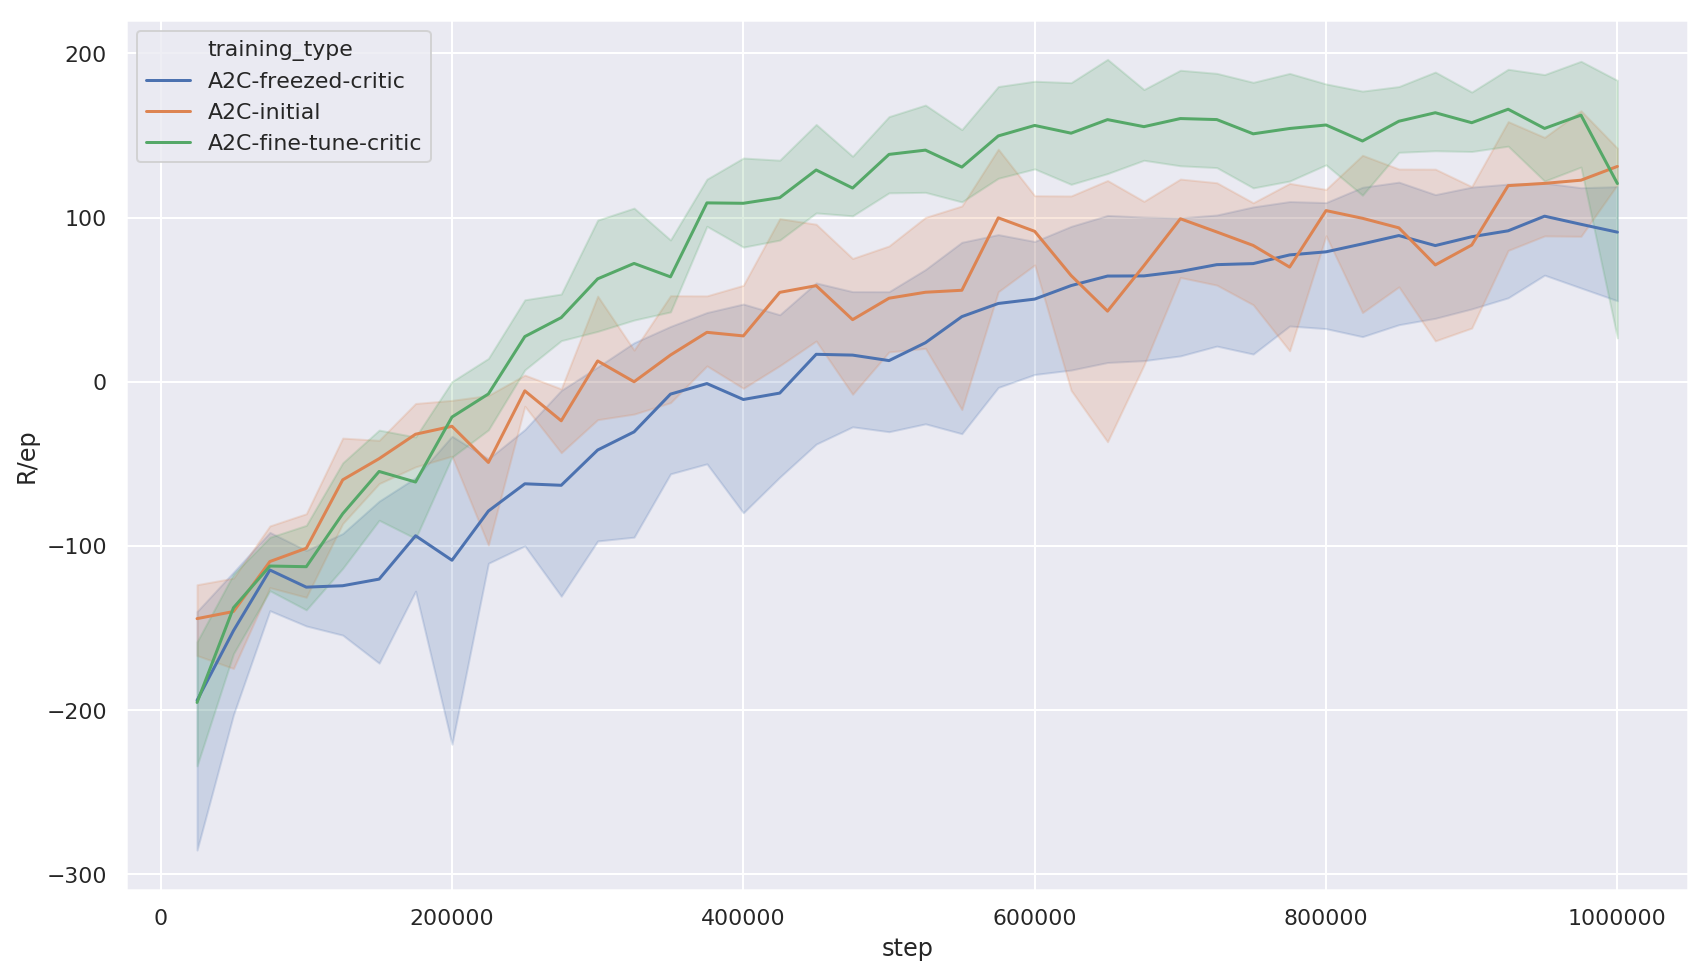

In [18]:
plot(a2c_df, x="step", hue="training_type", window=0, width=14, height=8)